In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file
df = pd.read_csv('bank_marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Performing EDA on the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [7]:
df.shape

(45211, 19)

In [8]:
# checking how many total variables are there in the target variable or target feature
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [9]:
# Finding out the mean, median and minimum value of the pdays column

print(df['pdays'].mean()) 
print(df['pdays'].median())
print(df['pdays'].min())

40.19782796222158
-1.0
-1


In [10]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

- From the above values we can see that, the pdays has the negative value
- pdays means, number of days that passed by after the client was last contacted from previous campaign
- But, days can not be negative

#### Now here I will remove all the negative values from the pdays column as we can not have the negative days

In [11]:
# here we are selecting those values whcih are positive in the pdays column 
newdf = df[df['pdays']>0]

In [12]:
newdf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [13]:
newdf['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [14]:
newdf['pdays'].median()

194.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0b6842730>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0b6842df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0b68423d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0b685a4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0b685a850>],
 'means': []}

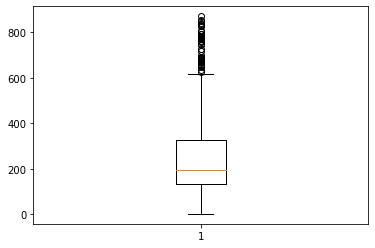

In [15]:
plt.boxplot(newdf['pdays'])

<AxesSubplot:ylabel='education'>

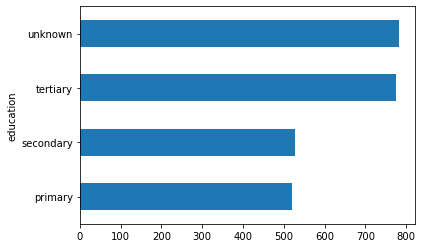

In [16]:
df.groupby(newdf['education'])['balance'].median().plot.barh()

<AxesSubplot:ylabel='education'>

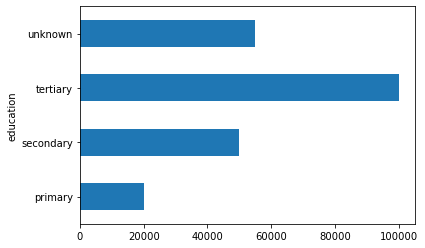

In [17]:
newdf.groupby(newdf['education'])['salary'].median().plot.barh()

newdf.head()

In [18]:
# checking how many records are there in our target feature (percentage)
newdf['response'].value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

### Now, here I will convert the target feature into the numerical form as machine learning model only works on numerical data

In [19]:
# replacing response column with the numerical values as it is a categorical column and replacing 'yes' as 1 and 'no' as 0 
datamapping = {"yes":1, "no":0}

In [20]:
# mapping the converted records into the main data using map function
newdf['response']=newdf['response'].map(datamapping)

In [21]:
newdf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [22]:
# here getting all the categorical and numerical features in a seperate list

obj_col = []
num_col = []
for i in newdf.columns:
    if newdf[i].dtype=='O':
        obj_col.append(i)
    else:
        num_col.append(i)

In [23]:
print("Categorical Columns: ",obj_col)
print("Numerical Columns: ",num_col)

Categorical Columns:  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns:  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


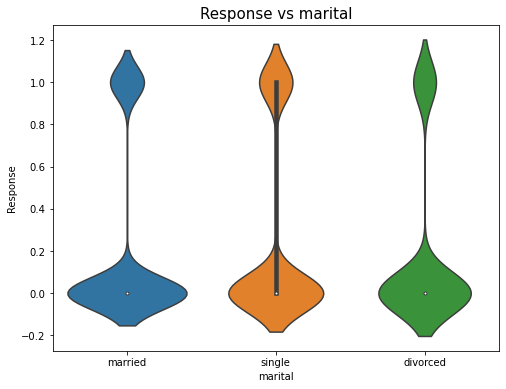

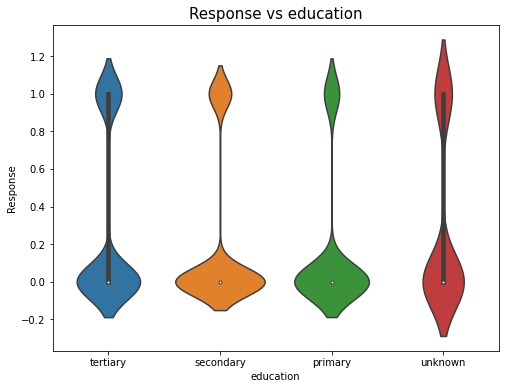

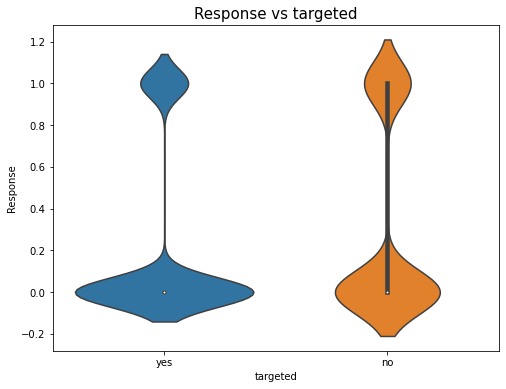

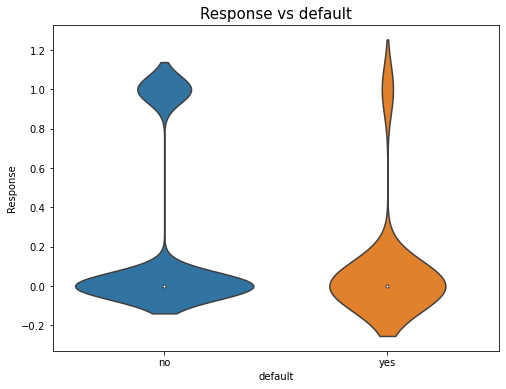

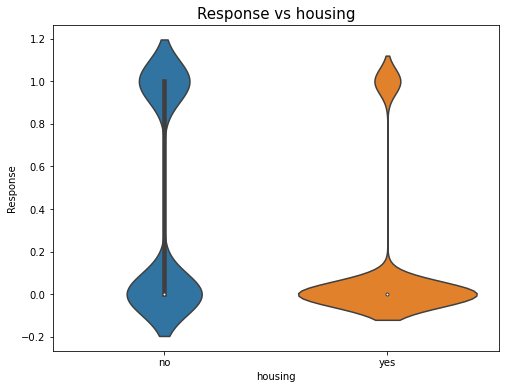

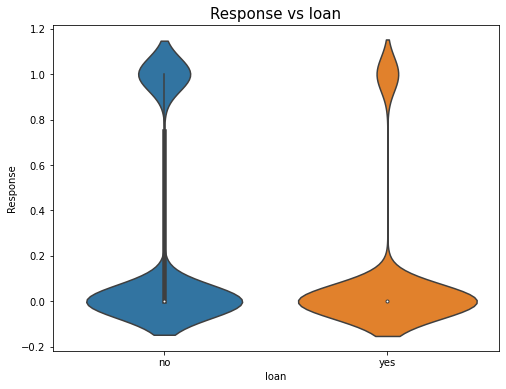

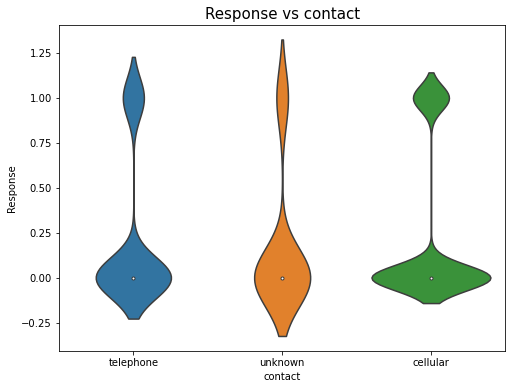

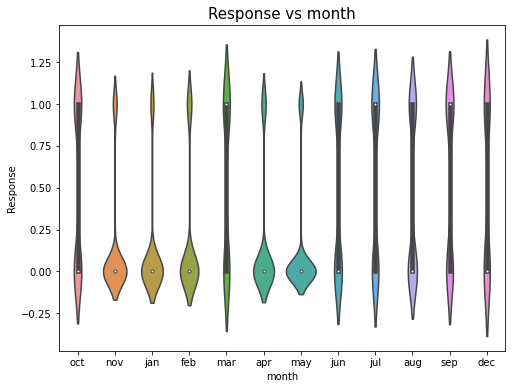

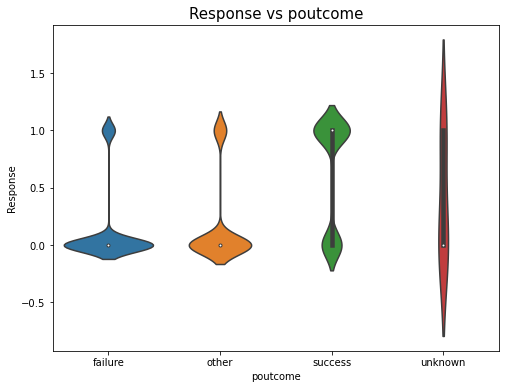

In [24]:
# creating a loop to show the boxplot for all the categorical features with the dependent feature
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(newdf[col],newdf["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

Text(0.5, 1.0, 'Correlation between all the Numerical Features')

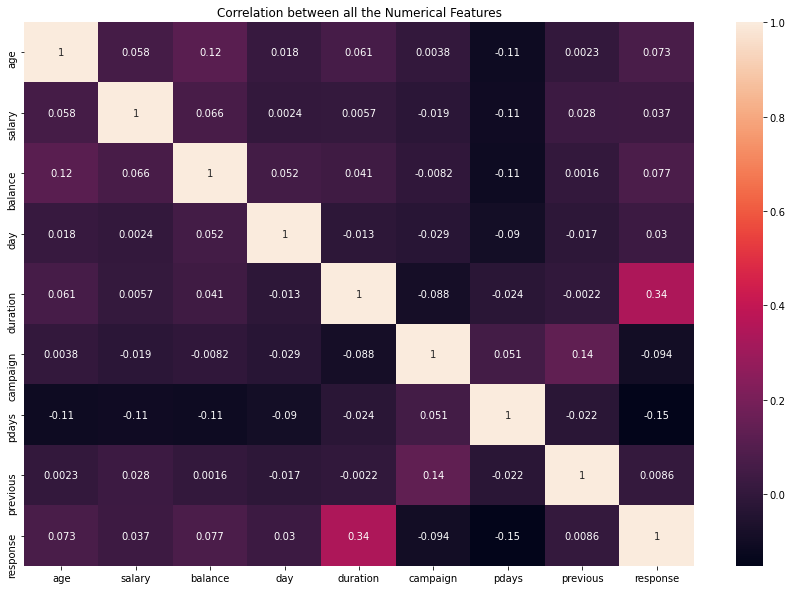

In [25]:
# checking the correlation between the independent and dependent feature
plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr(), annot=True)
plt.title('Correlation between all the Numerical Features')

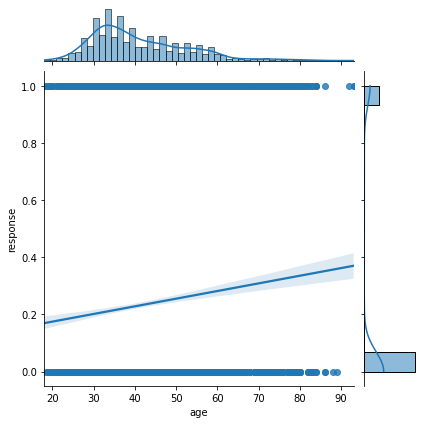

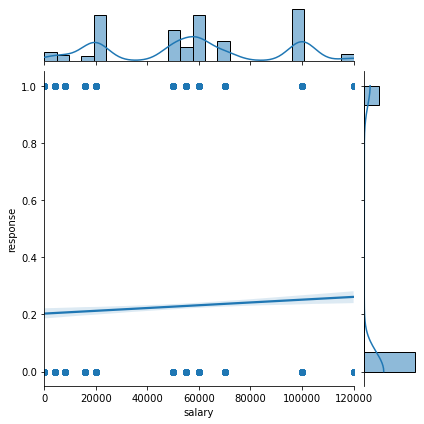

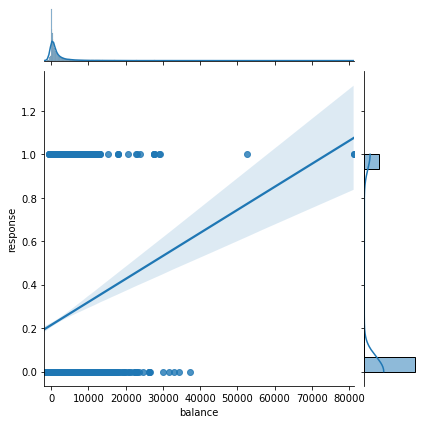

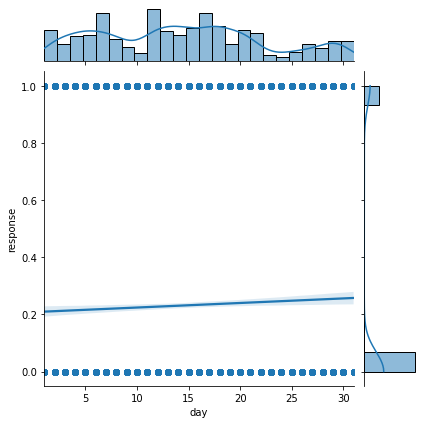

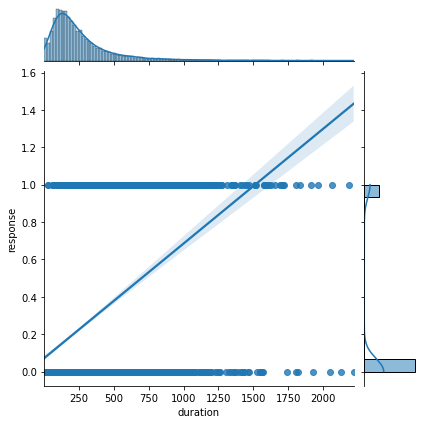

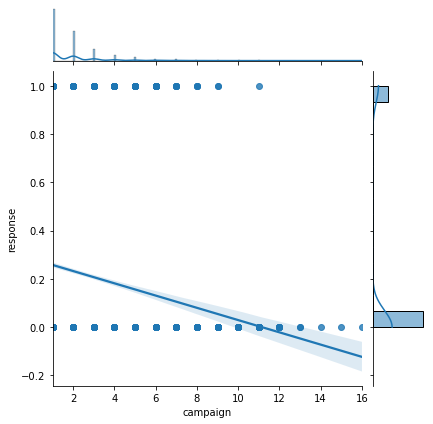

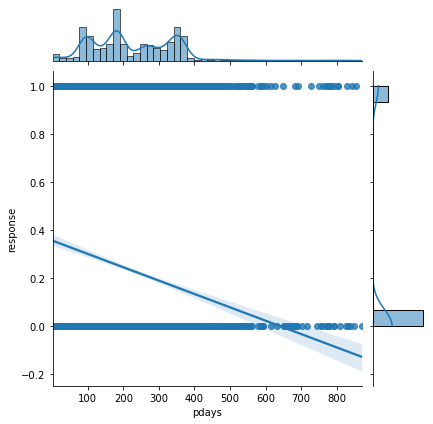

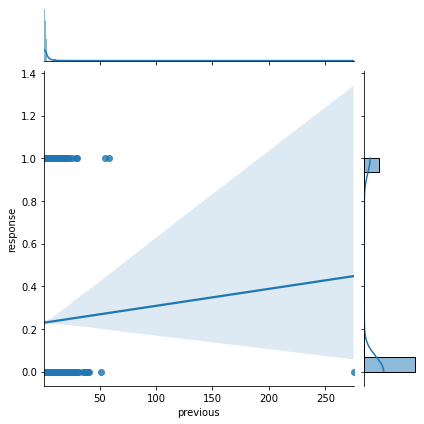

In [26]:
for i in num_col[:-1]:
    sns.jointplot(x=newdf[i], y=newdf['response'], kind='reg')
    plt.xlabel(i)
    plt.ylabel("response")
    plt.show()

### Now, after this I will convert all the categorical features into the numerical type as machine learnign model understand only numerical data
### And for that I will use LabelEncoder from sklearn library to convert the categorical features into numerical 

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
# converting all the categorical values into numerical values using LabelEncoder
leobj = newdf[obj_col].apply(le.fit_transform)

In [30]:
leobj

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1
45201,4,1,2,1,0,0,0,0,9,2
45204,5,1,1,1,0,0,0,0,9,0
45208,5,1,1,1,0,0,0,0,9,2


In [31]:
num_col

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [32]:
lenum = newdf[num_col]
lenum

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...
45199,34,20000,1475,16,1166,3,530,12,0
45201,53,100000,583,17,226,1,184,4,1
45204,73,55000,2850,17,300,1,40,8,1
45208,72,55000,5715,17,1127,5,184,3,1


In [33]:
dfmain = leobj.join(lenum)

In [34]:
dfmain

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,1


In [35]:
dfmain.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


<AxesSubplot:>

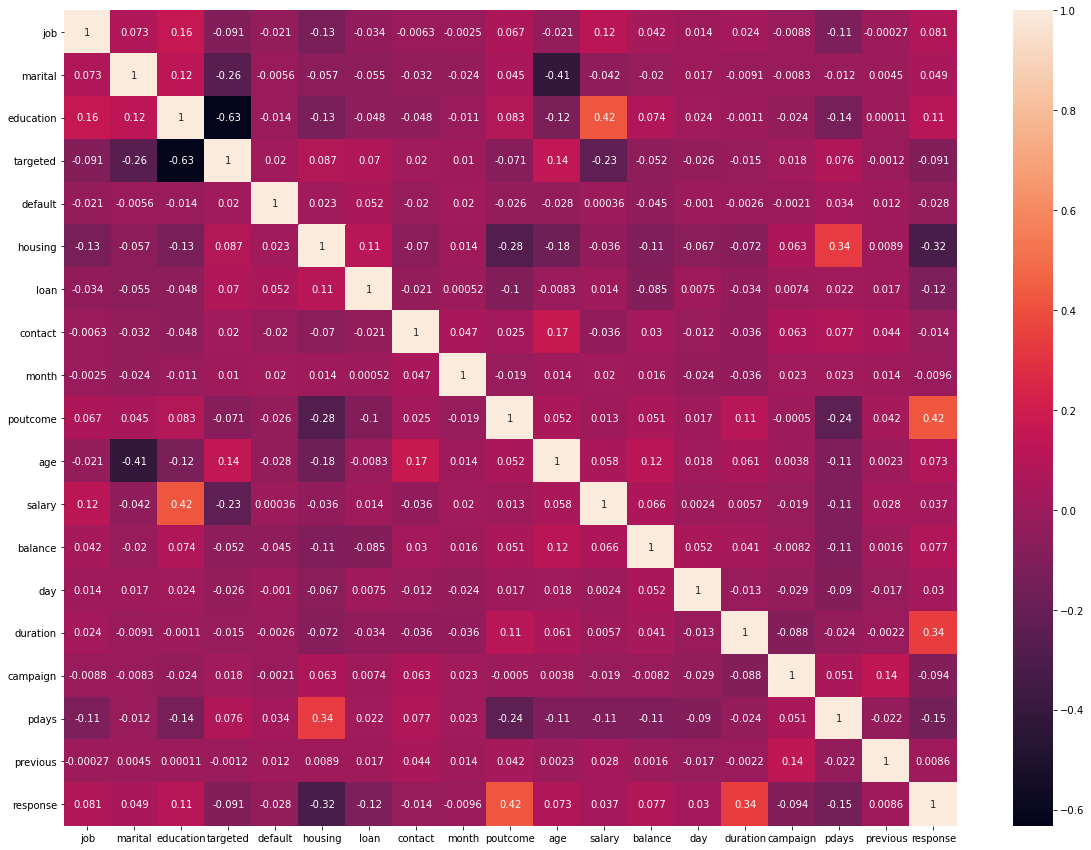

In [36]:
# checking the correlation of the features using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(dfmain.corr(), annot=True)

### Train test split

In [37]:
dfmain.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [38]:
# storing independent and dependent features

X = dfmain.drop('response', axis=1)

y = dfmain['response']

In [39]:
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [40]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_predict = lr.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
# checking the accuracy on training data
y_pred_train=lr.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train,y_train)
print('Training Dataset Accuracy',training_data_accuracy)

Training Dataset Accuracy 0.7788039364118092


In [57]:

print('Testing Dataset Accuracy',accuracy_score(y_test, y_predict))

Testing Dataset Accuracy 0.7875302663438256


In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87      1279
           1       0.58      0.21      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.76      0.79      0.75      1652



In [65]:
confusion_matrix(y_test, y_predict)

array([[1224,   55],
       [ 296,   77]], dtype=int64)

### Now I will use CV and some hyperparameter to deal with this data and then I will check the new score of the model

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [59]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None, shuffle=False)

In [60]:
clf = GridSearchCV(log_class, grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [61]:
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [62]:
y_predlrgrid = clf.predict(X_test)
print(confusion_matrix(y_test,y_predlrgrid))
print(accuracy_score(y_test,y_predlrgrid))
print(classification_report(y_test,y_predlrgrid))

[[1227   52]
 [ 300   73]]
0.7869249394673123
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.29       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.75      0.79      0.74      1652



## RandomForest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# checking the accuracy on training data
Y_train_rfprediction = rfclassifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, Y_train_rfprediction)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 1.0


In [68]:
# accuracy score and classification report of the Random Forest
y_predrfclassifier = rfclassifier.predict(X_test)
print(confusion_matrix(y_test,y_predrfclassifier))
print(accuracy_score(y_test,y_predrfclassifier))
print(classification_report(y_test,y_predrfclassifier))

[[1194   85]
 [ 136  237]]
0.8662227602905569
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1279
           1       0.74      0.64      0.68       373

    accuracy                           0.87      1652
   macro avg       0.82      0.78      0.80      1652
weighted avg       0.86      0.87      0.86      1652



## XGboost Classifier

In [82]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [81]:
# Hyper Parameter Optimization

params = {
  "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30],
  "max_depth"        : [3,4,5,6,8,10,12,15],
  "min_child_weight" : [1,3,5,7],
  "gamma"            : [0.0,0.1,0.2,0.3,0.4],
  "colsample_bytree" : [0.3,0.4,0.5,0.7]
    
}

In [83]:
classifier = xgboost.XGBClassifier()

In [84]:
random_searchcv = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)

In [85]:
random_searchcv.fit(X_train, y_train)

[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [86]:
y_predict_xgb = random_searchcv.predict(X_test)

In [93]:
print("Testing Dataset Accuracy: ", accuracy_score(y_test, y_predict_xgb))

Testing Dataset Accuracy:  0.8662227602905569


In [88]:
# checking the accuracy on training data
Y_train_xgbprediction = random_searchcv.predict(X_train)
training_data_accuracy = accuracy_score(y_train, Y_train_xgbprediction)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9040121120363361


In [89]:
print(confusion_matrix(y_test, y_predict_xgb))

[[1191   88]
 [ 133  240]]


In [91]:
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1279
           1       0.73      0.64      0.68       373

    accuracy                           0.87      1652
   macro avg       0.82      0.79      0.80      1652
weighted avg       0.86      0.87      0.86      1652

